In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import zscore

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%pip install pandas-summary

# ÌååÏùºÎì§Ïù¥ ÏûàÎäî Ìè¥Îçî Í≤ΩÎ°ú
folder_path = 'C:/Users/mumu1/Desktop/project_movie_data/project_dataset'

# ÌååÏùº Ïù¥Î¶ÑÏùÑ Î≥ÄÏàòÏóê Ìï†Îãπ
o_df_customers = pd.read_csv(os.path.join(folder_path, 'olist_customers_dataset.csv'), encoding='ISO-8859-1')
o_df_geolocation = pd.read_csv(os.path.join(folder_path, 'olist_geolocation_dataset.csv'), encoding='ISO-8859-1')
o_df_order_items = pd.read_csv(os.path.join(folder_path, 'olist_order_items_dataset.csv'), encoding='ISO-8859-1')
o_df_order_payments = pd.read_csv(os.path.join(folder_path, 'olist_order_payments_dataset.csv'), encoding='ISO-8859-1')
o_df_order_reviews = pd.read_csv(os.path.join(folder_path, 'olist_order_reviews_dataset.csv'), encoding='ISO-8859-1')
o_df_products = pd.read_csv(os.path.join(folder_path, 'olist_products_dataset.csv'), encoding='ISO-8859-1')
o_df_sellers = pd.read_csv(os.path.join(folder_path, 'olist_sellers_dataset.csv'), encoding='ISO-8859-1')

print("‚úÖ Î™®Îì† ÌååÏùºÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏóàÏäµÎãàÎã§.")

# Ïπ¥ÌîºÎ≥∏ ÏÉùÏÑ±
df_customers = o_df_customers.copy()
df_geolocation = o_df_geolocation.copy()
df_order_items = o_df_order_items.copy()
df_order_payments = o_df_order_payments.copy()
df_order_reviews = o_df_order_reviews.copy()
df_products = o_df_products.copy()
df_sellers = o_df_sellers.copy()


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
‚úÖ Î™®Îì† ÌååÏùºÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏóàÏäµÎãàÎã§.


In [3]:
# 7Í∞ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
def check_missing(dfs, df_names):
    for df, name in zip(dfs, df_names):
        print(f"\nüìä {name} Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù")
        
        missing_info = df.isnull().sum()
        m_pct = (missing_info / len(df)) * 100
        
        if missing_info.sum() == 0:
            print("‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ")
        else:
            print("‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨")
            missing_sum = pd.DataFrame({
                'Í≤∞Ï∏°Ïàò': missing_info,
                'Í≤∞Ï∏°Ïú®(%)': m_pct,
            }).round(2)
            missing_sum = missing_sum[missing_sum['Í≤∞Ï∏°Ïàò'] > 0]
            display(missing_sum)

# ÏÇ¨Ïö© ÏòàÏãú
original_dfs = [ 
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers
]

df_names = [
    "customers", "geolocation", "order_items",
    "order_payments", "order_reviews", "products",
    "sellers"
]

check_missing(original_dfs, df_names)


üìä customers Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä geolocation Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_items Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_payments Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ

üìä order_reviews Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Ïú®(%)
review_comment_title    87656   88.34
review_comment_message  58247   58.70


üìä products Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚ö†Ô∏è Í≤∞Ï∏°Ïπò Ï°¥Ïû¨


Í≤∞Ï∏°Ïàò  Í≤∞Ï∏°Ïú®(%)
product_category_name       610    1.85
product_name_lenght         610    1.85
product_description_lenght  610    1.85
product_photos_qty          610    1.85
product_weight_g              2    0.01
product_length_cm             2    0.01
product_height_cm             2    0.01
product_width_cm              2    0.01


üìä sellers Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Í∞í Î∂ÑÏÑù
‚úÖ Í≤∞Ï∏°Í∞í ÏóÜÏùå. ÏôÑÏ†Ñ


In [4]:
# orders ÌååÏùº ÏùΩÏñ¥Ïò§Í∏∞
file_path_absolute ='C:/Users/mumu1/Desktop/project_movie_data/project_dataset/olist_orders_dataset.csv'
o_df_order = pd.read_csv(file_path_absolute, encoding='ISO-8859-1')

df_order = o_df_order.copy()

# orders Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ : ÎàÑÎùΩ, Ï§ëÎ≥µ, Ïù¥ÏÉÅ
display(o_df_order.head())
o_df_order.describe()
o_df_order.info()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# o_df_order

# Í≤∞Ï∏°Í∞í ÌôïÏù∏
o_df_order.isnull().sum()

# 1. Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏ Ï†ïÏùò
missing_value_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# 2. Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Í≤∞Ï∏°Ïπò Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Î∂àÎ¶¨Ïñ∏ ÎßàÏä§ÌÅ¨(Boolean Mask) ÏÉùÏÑ±
# 'isnull()' Ìï®ÏàòÎäî Í≤∞Ï∏°Ïπò(NaN)Ïùº Îïå TrueÎ•º Î∞òÌôòÌï©ÎãàÎã§.
approved_at_na = df_order['order_approved_at'].isnull()
carrier_date_na = df_order['order_delivered_carrier_date'].isnull()
customer_date_na = df_order['order_delivered_customer_date'].isnull()

# 3. ÏÑ∏ Í∞ÄÏßÄ ÎßàÏä§ÌÅ¨Î•º '|' (or) Ïó∞ÏÇ∞ÏûêÎ°ú Í≤∞Ìï©
# Ïù¥ Ï°∞Í±¥Îì§ Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ ÌñâÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
na_mask = approved_at_na | carrier_date_na | customer_date_na

# 4. ÎßàÏä§ÌÅ¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
df_na = df_order[na_mask]

# 5. ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÎ∂ÄÎ•º ÌôïÏù∏
print("Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
print(df_na.head())

# 6. Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Í∞úÏàò ÌôïÏù∏
print(f"\nÍ≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¥ù ÌñâÏùò Ïàò: {len(df_na)}")

# o_df_order Í≤∞Ï∏°Î•†
print(df_order.isnull().sum() / len(df_order))

# 5%Ïù¥Ìïò 3Í∞ú Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_order.dropna(subset=['order_approved_at'], inplace=True)
df_order.dropna(subset=['order_delivered_carrier_date'], inplace=True)
df_order.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Î≥ÄÍ≤ΩÏÇ¨Ìï≠ ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ df_orderÏùò Ï†ïÎ≥¥:")
print(df_order.info())


Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî ÌñâÏùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:
                             order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   

    order_status order_purchase_timestamp    order_approved_at  \
6       invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154      shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaN         

In [ ]:
# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ: Í≥ÑÏÇ∞Ìïú Î∞∞ÏÜ°ÏãúÍ∞Ñ Ï∞®Ïù¥Í∞Ä ÌÅ¨Í±∞ÎÇò ÏûëÏùÄ Í≤ΩÏö∞
print('\n=== Ïù¥ÏÉÅÍ∞í ÌôïÏù∏ ===')

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
df_order["order_approved_at"] = pd.to_datetime(df_order["order_approved_at"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_delivered_carrier_date"] = pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"] = pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_estimated_delivery_date"] = pd.to_datetime(df_order["order_estimated_delivery_date"])

# ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
# Í≤∞Ï†úÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ: Ï£ºÎ¨∏ÏäπÏù∏Ïùº - Í≤∞Ï†úÏùº
df_order["purchase_to_approved"] = (df_order["order_approved_at"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400
# Ï£ºÎ¨∏-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: Î∞∞ÏÜ°ÏôÑÎ£åÏùº - Ï£ºÎ¨∏ÏäπÏù∏Ïùº
df_order["approved_to_carrier"] = (df_order["order_delivered_carrier_date"] - df_order["order_approved_at"]).dt.total_seconds()/86400
# ÌÉùÎ∞∞ÏÇ¨-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: Î∞∞ÏÜ°ÏôÑÎ£åÏùº - ÌÉùÎ∞∞ÏÇ¨ Ï†ÑÎã¨Ïùº
df_order["carrier_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"]).dt.total_seconds()/86400
# Í≥ÑÏÇ∞-Î∞∞ÏÜ° Í±∏Î¶∞ ÏãúÍ∞Ñ: - Î∞∞ÏÜ°ÏôÑÎ£åÏùº - Ï£ºÎ¨∏Í≥ÑÏÇ∞Ïùº
df_order["purchase_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400

# Î™®Îì† ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ïª¨ÎüºÏóêÏÑú ÏùåÏàò Í∞íÎßå Ï∞æÍ∏∞
# ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ïª¨Îüº Î¶¨Ïä§Ìä∏
time_cols = ["purchase_to_approved","approved_to_carrier","carrier_to_customer","purchase_to_customer"]

# Í∞Å Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò Í≥ÑÏÇ∞
neg_counts = {col: (df_order[col] < 0).sum() for col in time_cols}

# Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàòÏù∏ Í≤ΩÏö∞)
total_neg = df_order[(df_order[time_cols] < 0).any(axis=1)].shape[0]

# Í≤∞Í≥º Ï∂úÎ†•
print("Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò:", neg_counts)
print("Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàò):", total_neg)


=== Ïù¥ÏÉÅÍ∞í ÌôïÏù∏ ===
Ïª¨ÎüºÎ≥Ñ ÏùåÏàò Í∞úÏàò: {'purchase_to_approved': np.int64(0), 'approved_to_carrier': np.int64(0), 'carrier_to_customer': np.int64(0), 'purchase_to_customer': np.int64(0)}
Ï†ÑÏ≤¥ ÏùåÏàò Í∞úÏàò (Ìïú ÌñâÏù¥ÎùºÎèÑ ÏùåÏàò): 0
<class 'pandas.core.frame.DataFrame'>
Index: 77694 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       77694 non-null  object        
 1   customer_id                    77694 non-null  object        
 2   order_status                   77694 non-null  object        
 3   order_purchase_timestamp       77694 non-null  datetime64[ns]
 4   order_approved_at              77694 non-null  datetime64[ns]
 5   order_delivered_carrier_date   77694 non-null  datetime64[ns]
 6   order_delivered_customer_date  77694 non-null  datetime64[ns]
 7   order_estimated_delivery_date  77694 non

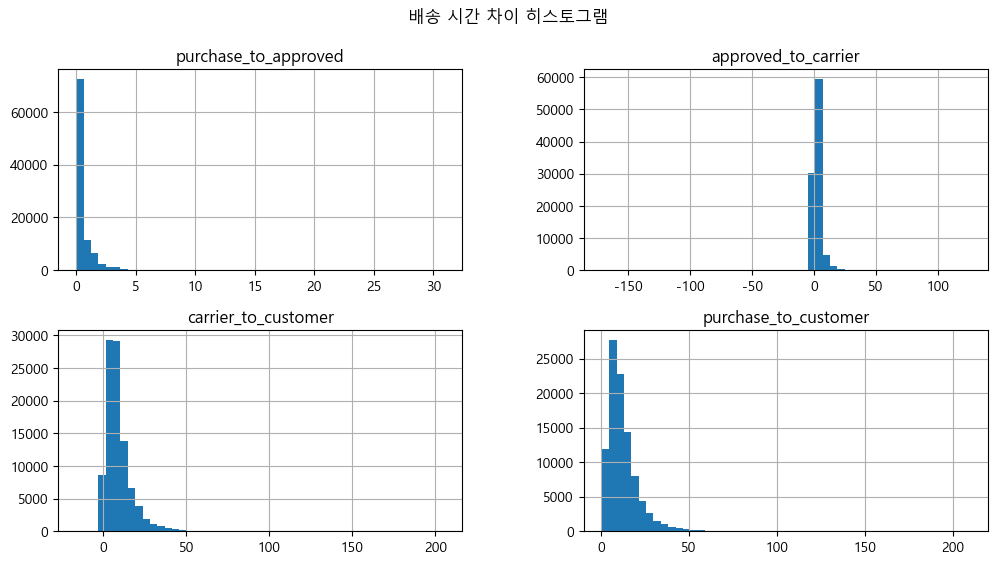

=== Z-score Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® (|Z|>3) ===
purchase_to_approved: 2.26%
approved_to_carrier: 1.92%
carrier_to_customer: 1.64%
purchase_to_customer: 1.63%

=== IQR Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® ===
purchase_to_approved: 9.26%
approved_to_carrier: 5.80%
carrier_to_customer: 5.26%
purchase_to_customer: 5.08%


In [7]:
# df_order Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ÏãúÍ∞ÅÌôî

# 1Ô∏è‚É£ ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("Î∞∞ÏÜ° ÏãúÍ∞Ñ Ï∞®Ïù¥ ÌûàÏä§ÌÜ†Í∑∏Îû®")
plt.show()

# 2Ô∏è‚É£ Í∑πÎã®Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
print("=== Z-score Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® (|Z|>3) ===")
for col in time_cols:
    z = zscore(df_order[col].dropna())
    outlier_ratio = (abs(z) > 3).mean() * 100
    print(f"{col}: {outlier_ratio:.2f}%")

# 3Ô∏è‚É£ IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÎπÑÏú® Í≥ÑÏÇ∞
print("\n=== IQR Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÎπÑÏú® ===")
for col in time_cols:
    data = df_order[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    iqr_outlier_ratio = ((data < lower_bound) | (data > upper_bound)).mean() * 100
    print(f"{col}: {iqr_outlier_ratio:.2f}%")

In [8]:
# df_order Ïù¥ÏÉÅÏπò Ï†úÍ±∞
time_cols = ["purchase_to_approved", "approved_to_carrier", "carrier_to_customer", "purchase_to_customer"]

def remove_iqr_outliers_combined(df_order, cols):
    # Îπà ÎßàÏä§ÌÅ¨(mask) ÏÉùÏÑ±
    combined_mask = pd.Series([True] * len(df_order), index=df_order.index)
    
    for col in cols:
        data = df_order[col].dropna()
        if data.empty:
            print(f"Warning: No data to analyze for {col}. Skipping.")
            continue
            
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎäî ÌñâÏùÑ TrueÎ°ú ÌïòÎäî ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
        col_mask = (df_order[col] >= lower_bound) & (df_order[col] <= upper_bound)
        
        # ÏµúÏ¢Ö ÎßàÏä§ÌÅ¨Ïóê ÌòÑÏû¨ Ïª¨ÎüºÏùò ÎßàÏä§ÌÅ¨Î•º Í≤∞Ìï© (AND Ïó∞ÏÇ∞)
        # combined_mask = combined_mask & col_mask
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞Î•º Í≥†Î†§ÌïòÏó¨ `.fillna(False)`Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Îçî ÏïàÏ†ÑÌï©ÎãàÎã§.
        combined_mask &= col_mask.fillna(True)
        
        print(f"'{col}'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.")
        
    # ÏµúÏ¢Ö ÎßàÏä§ÌÅ¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ df_order ÏÉùÏÑ±
    df_order = df_order[combined_mask].copy()
    
    initial_len = len(df_order)
    removed_count = initial_len - len(df_order)
    
    print(f"\nÏ¥ù Ïù¥ÏÉÅÏπò Ï†úÍ±∞: {initial_len} -> {len(df_order)} (Ï†úÍ±∞Îêú Ìñâ Ïàò: {removed_count})")
    
    return df_order

# Ïã§Ìñâ
df_order = remove_iqr_outliers_combined(df_order, time_cols)

# ÏµúÏ¢Ö df_order Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÌÉú ÌôïÏù∏
print("\n[ÏµúÏ¢Ö df_orderÏùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ]")
print(df_order[time_cols].describe())

'purchase_to_approved'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'approved_to_carrier'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'carrier_to_customer'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.
'purchase_to_customer'Ïóê ÎåÄÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± ÏôÑÎ£å.

Ï¥ù Ïù¥ÏÉÅÏπò Ï†úÍ±∞: 78243 -> 78243 (Ï†úÍ±∞Îêú Ìñâ Ïàò: 0)

[ÏµúÏ¢Ö df_orderÏùò Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ]
       purchase_to_approved  approved_to_carrier  carrier_to_customer  \
count          78243.000000         78243.000000         78243.000000   
mean               0.213960             2.205594             7.855824   
std                0.392342             1.730066             5.227605   
min                0.000000            -1.333345            -2.892384   
25%                0.008681             0.868738             3.970093   
50%                0.012650             1.712755             6.937755   
75%                0.100260             3.159306            10.946759   
max                1.498750             7.626204            23.921458   

       purch

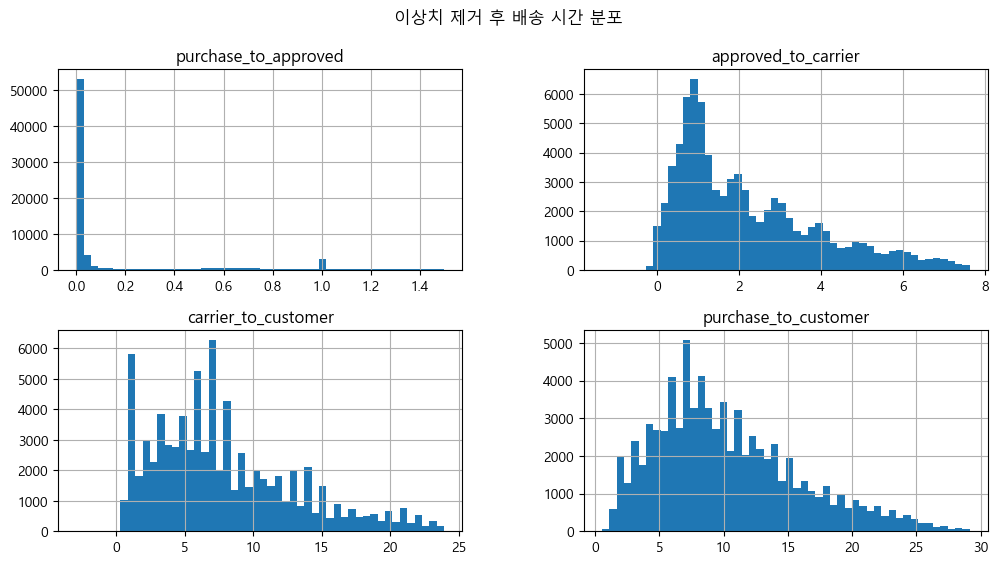

order_purchase_timestamp              order_approved_at  \
count                          77694                          77694   
mean   2018-01-02 11:09:14.460395776  2018-01-02 16:14:00.467886848   
min              2016-10-03 22:31:31            2016-10-04 10:19:23   
25%    2017-09-10 18:02:16.750000128     2017-09-10 19:43:28.500000   
50%       2018-01-20 09:12:31.500000     2018-01-20 11:57:48.500000   
75%              2018-05-09 10:38:10            2018-05-09 14:15:06   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          77694                          77694   
mean   2018-01-04 21:33:17.827760128  2018-01-12 18:20:05.613895680   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%       2017-09-12 20:04:04.500000  2017-09-19 18:45:28.249999872   
50%              2018-01-23 18:20:05            2018-01-31 17:21:09   
75%              2018-05-10 18:29:00            2018-05-17 19:29:21   
max              2018-08-30 14:58:00            2018-09-10 22:38:43   
std                              NaN                            NaN   

       order_estimated_delivery_date  purchase_to_approved  \
count                          77694          77694.000000   
mean   2018-01-25 10:53:28.834659072              0.211644   
min              2016-11-23 00:00:00              0.000000   
25%              2017-09-29 00:00:00              0.008669   
50%              2018-02-15 00:00:00              0.012593   
75%              2018-05-30 00:00:00              0.092442   
max              2018-10-23 00:00:00              1.498750   
std                              NaN              0.390404   

       approved_to_carrier  carrier_to_customer  purchase_to_customer  
count         77694.000000         77694.000000          77694.000000  
mean              2.221729             7.865831             10.299203  
min               0.000174             0.000000              0.533414  
25%               0.880414             3.970243              6.166548  
50%               1.728976             6.942853              9.165376  
75%               3.172173            10.957297             13.545168  
max               7.626204            23.921458             29.149572  
std               1.724586             5.232599              5.577010

In [9]:
# df_order
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Î∞∞ÏÜ° ÏãúÍ∞Ñ Î∂ÑÌè¨ ÌôïÏù∏
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Î∞∞ÏÜ° ÏãúÍ∞Ñ Î∂ÑÌè¨")
plt.show()

# Ïù¥ÏÉÅÏπò ÌôïÏù∏ ÌõÑ ÎèÑÎ©îÏù∏ Í∑úÏπô Í∏∞Î∞ò Ï†úÍ±∞
df_order = df_order[df_order['approved_to_carrier'] >= 0]
df_order = df_order[df_order['carrier_to_customer'] >= 0]

# Í∏∞Ï¥à ÌÜµÍ≥Ñ ÌôïÏù∏
df_order[time_cols].describe()

df_order.describe()
# df_order = df_deliverd_clean


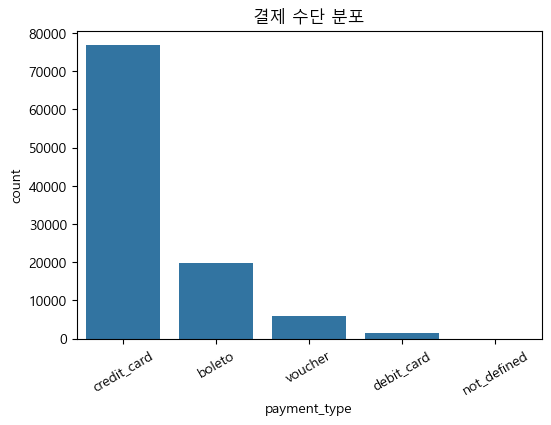


[Í≤∞Ï†ú ÏàòÎã® ÎπÑÏú®]
payment_type
credit_card    0.739
boleto         0.190
voucher        0.056
debit_card     0.015
not_defined    0.000
Name: proportion, dtype: float64


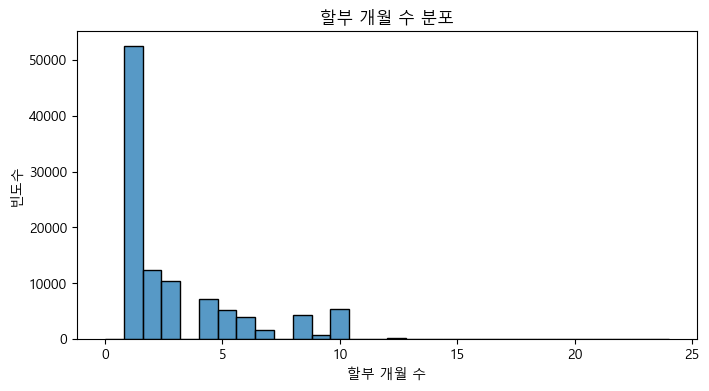


[Ìï†Î∂Ä Í∞úÏõî Ïàò ÌÜµÍ≥Ñ]
count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64


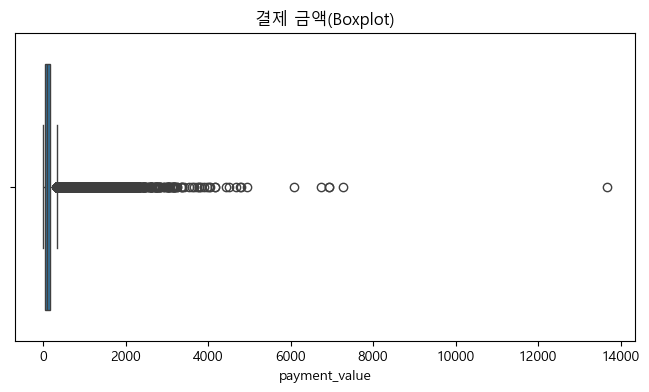

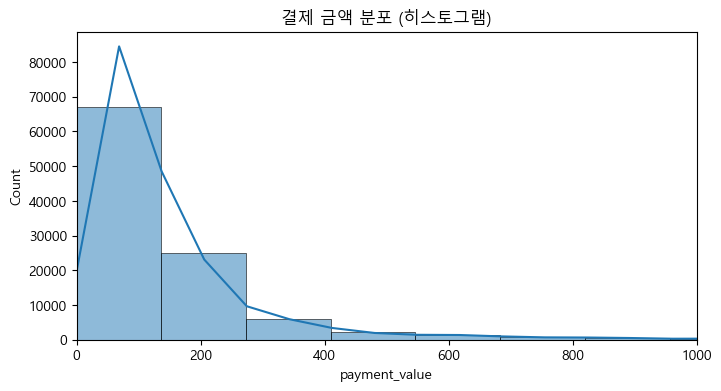


[Í≤∞Ï†ú Í∏àÏï° ÌÜµÍ≥Ñ]
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

[Í≤∞Ï†ú Í∏àÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò] 7981 / 103886 (7.68%)


' Ïù¥ÏÉÅÏπò Í∞ÑÏ£º\npayment_type: 0, ÏùåÏàò, not_defined Ï†úÍ±∞\npayment_installments (Ìï†Î∂Ä Í∞úÏõî Ïàò): 0(ÏùºÏãúÎ∂à)/ ÏùåÏàò, 24Í∞úÏõî Ï¥àÍ≥º Ï†úÍ±∞\npayment_value: 0(ÏùºÏãúÎ∂à), / ÏùåÏàò, Q1, Q3 Í∏∞Î∞ò IQRÎ°ú Í∑πÎã®Ïπò Í≤ÄÏ∂ú -> Winsorization (ÏÉÅÌïú Ï†àÎã®)\n\nÌèâÍ∑†(Mean) = 154.1 ‚Üí Í∑πÎã®Í∞í(Í≥†Ïï° Í≤∞Ï†ú)Ïùò ÏòÅÌñ•ÏúºÎ°ú ÌèâÍ∑†Ïù¥ Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅº\nÏµúÎåìÍ∞í = 13,664.08 ‚Üí Îã® 1Í±¥ Ï†ïÎèÑÏùò Ï¥àÍ≥†Ïï° Í≤∞Ï†ú (Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îß§Ïö∞ ÎèôÎñ®Ïñ¥Ïßê)\nIQR Ïù¥ÏÉÅÏπò ÎπÑÏú® ‚âà 7.7% (7,981Í±¥) ‚Üí Ï†ÑÏ≤¥ Í≤∞Ï†úÏùò ÏïΩ 8%Í∞Ä Í∑πÎã®Í∞í\n'

In [10]:
# df_order_payments: Í≤∞Ï∏°X Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

# 1. payment_type Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(6,4))
sns.countplot(data=o_df_order_payments, x='payment_type', order=o_df_order_payments['payment_type'].value_counts().index)
plt.title("Í≤∞Ï†ú ÏàòÎã® Î∂ÑÌè¨")
plt.xticks(rotation=30)
plt.show()

print("\n[Í≤∞Ï†ú ÏàòÎã® ÎπÑÏú®]")
print(o_df_order_payments['payment_type'].value_counts(normalize=True).round(3))

# 2. Ìï†Î∂Ä Í∞úÏõî Ïàò Î∂ÑÌè¨
plt.figure(figsize=(8,4))
sns.histplot(o_df_order_payments['payment_installments'], bins=30, kde=False)
plt.title("Ìï†Î∂Ä Í∞úÏõî Ïàò Î∂ÑÌè¨")
plt.xlabel("Ìï†Î∂Ä Í∞úÏõî Ïàò")
plt.ylabel("ÎπàÎèÑÏàò")
plt.show()

print("\n[Ìï†Î∂Ä Í∞úÏõî Ïàò ÌÜµÍ≥Ñ]")
print(o_df_order_payments['payment_installments'].describe())

# 3. Í≤∞Ï†ú Í∏àÏï° Î∂ÑÌè¨ (payment_value)
plt.figure(figsize=(8,4))
sns.boxplot(x=o_df_order_payments['payment_value'])
plt.title("Í≤∞Ï†ú Í∏àÏï°(Boxplot)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(o_df_order_payments['payment_value'], bins=100, kde=True)
plt.title("Í≤∞Ï†ú Í∏àÏï° Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)")
plt.xlim(0, 1000)  # Í≥†Ïï° Í≤∞Ï†úÎäî Îî∞Î°ú ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏùºÎã® 1000 Ïù¥ÌïòÎßå ÏãúÍ∞ÅÌôî
plt.show()

print("\n[Í≤∞Ï†ú Í∏àÏï° ÌÜµÍ≥Ñ]")
print(o_df_order_payments['payment_value'].describe())

# 4. Ïù¥ÏÉÅÏπò Í±¥Ïàò ÌôïÏù∏ (IQR Î∞©Ïãù)
Q1 = o_df_order_payments['payment_value'].quantile(0.25)
Q3 = o_df_order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (o_df_order_payments['payment_value'] < Q1 - 1.5*IQR) | (o_df_order_payments['payment_value'] > Q3 + 1.5*IQR)

print(f"\n[Í≤∞Ï†ú Í∏àÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò] {outlier_mask.sum()} / {len(o_df_order_payments)} ({outlier_mask.mean()*100:.2f}%)")

''' Ïù¥ÏÉÅÏπò Í∞ÑÏ£º
payment_type: 0, ÏùåÏàò, not_defined Ï†úÍ±∞
payment_installments (Ìï†Î∂Ä Í∞úÏõî Ïàò): 0(ÏùºÏãúÎ∂à)/ ÏùåÏàò, 24Í∞úÏõî Ï¥àÍ≥º Ï†úÍ±∞
payment_value: 0(ÏùºÏãúÎ∂à), / ÏùåÏàò, Q1, Q3 Í∏∞Î∞ò IQRÎ°ú Í∑πÎã®Ïπò Í≤ÄÏ∂ú -> Winsorization (ÏÉÅÌïú Ï†àÎã®)

ÌèâÍ∑†(Mean) = 154.1 ‚Üí Í∑πÎã®Í∞í(Í≥†Ïï° Í≤∞Ï†ú)Ïùò ÏòÅÌñ•ÏúºÎ°ú ÌèâÍ∑†Ïù¥ Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅº
ÏµúÎåìÍ∞í = 13,664.08 ‚Üí Îã® 1Í±¥ Ï†ïÎèÑÏùò Ï¥àÍ≥†Ïï° Í≤∞Ï†ú (Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îß§Ïö∞ ÎèôÎñ®Ïñ¥Ïßê)
IQR Ïù¥ÏÉÅÏπò ÎπÑÏú® ‚âà 7.7% (7,981Í±¥) ‚Üí Ï†ÑÏ≤¥ Í≤∞Ï†úÏùò ÏïΩ 8%Í∞Ä Í∑πÎã®Í∞í
'''


In [11]:
df_order_payments = o_df_order_payments
df_order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [12]:
'''
payments Ïù¥ÏÉÅÏπò ÎùºÎ≤®ÎßÅ Ï≤òÎ¶¨ -> ÎùºÎ≤®ÎßÅ df ÏÉùÏÑ±: df_label_payment
installments = 0 ‚Üí "ÏùºÏãúÎ∂à" Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Î≥ÄÌôò.
payment_value = 0 ‚Üí "0Ïõê Í≤∞Ï†ú" (ex. Ïø†Ìè∞, Î¨¥Î£åÎ∞∞ÏÜ°, Ï∑®ÏÜåÎêú Í±∞Îûò Îì±)ÏúºÎ°ú Î≥ÑÎèÑ ÎùºÎ≤®ÎßÅ.
'''
# Í≤∞Ï†úÎç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
df_lavel_payments = df_order_payments.copy()

# ÏùºÏãúÎ∂à ÎùºÎ≤®ÎßÅ
df_lavel_payments['installment_label'] = df_lavel_payments['payment_installments'].apply(
    lambda x: 'ÏùºÏãúÎ∂à' if x == 0 else 'Ìï†Î∂Ä'
)

# Í≤∞Ï†úÍ∏àÏï° ÎùºÎ≤®ÎßÅ
df_lavel_payments['payment_label'] = df_lavel_payments['payment_value'].apply(
    lambda x: '0ÏõêÍ≤∞Ï†ú' if x == 0 else 'Ïú†Î£åÍ≤∞Ï†ú'
)

# Î∂ÑÌè¨ ÌôïÏù∏
print(df_lavel_payments['installment_label'].value_counts())
print(df_lavel_payments['payment_label'].value_counts())

# Ïù¥ÏÉÅÏπòÎ°ú Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂Ä ÌôïÏù∏
print(df_lavel_payments[df_lavel_payments['payment_value'] == 0].head(10))

installment_label
Ìï†Î∂Ä     103884
ÏùºÏãúÎ∂à         2
Name: count, dtype: int64
payment_label
Ïú†Î£åÍ≤∞Ï†ú    103877
0ÏõêÍ≤∞Ï†ú         9
Name: count, dtype: int64
                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value installment_label p

In [ ]:
'''
MERGE
customer Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ: Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÏïàÌï®, Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§ ÏµúÏÜåÌôî
customer states Ïª¨Îüº: SP(ÏÉÅÌååÏö∏Î£® Ï£º), RJ (Î¶¨Ïö∞Îç∞ÏûêÎÑ§Ïù¥Î£® Ï£º)
'''
# df_order.info() #77694, Ïª¨Îüº 12Í∞ú
# df_customers.info() #99441 Ïª¨Îüº 5Í∞ú

# 1. Ï£ºÎ¨∏ + Í≥†Í∞ù Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ Ï°∞Ïù∏ (order_id Í∏∞Ï§Ä)
join_order_c= df_order.merge(
    df_customers[['customer_id', 'customer_city']],  # ÌïÑÏöîÌïú ÏπºÎüºÎßå
    on='customer_id',
    how='left'   # Ï£ºÎ¨∏ÏùÄ Î∞òÎìúÏãú Ïú†ÏßÄ, Í≥†Í∞ù Ï†ïÎ≥¥Í∞Ä ÏóÜÏúºÎ©¥ NaN
)

print(f"Merge ÌõÑ Î†àÏΩîÎìú Ïàò: {len(join_order_c)}")
print(f"ÏõêÎ≥∏ df_order Î†àÏΩîÎìú Ïàò: {len(df_order)}")
print("Í≥†Ïú† order_id Í∞úÏàò:", join_order_c['order_id'].nunique())
print("Ï†ÑÏ≤¥ order_id ÎåÄÎπÑ Ï§ëÎ≥µ ÎπÑÏú®:", 1 - join_order_c['order_id'].nunique() / len(join_order_c))

print("customer_city Í≤∞Ï∏°Ïπò Í∞úÏàò:", join_order_c['customer_city'].isnull().sum())
print("customer_city Í≤∞Ï∏°Ïπò ÎπÑÏú®:", join_order_c['customer_city'].isnull().mean())

print(join_order_c.dtypes)

join_order_c['purchase_to_approved'].head()

Merge ÌõÑ Î†àÏΩîÎìú Ïàò: 77694
ÏõêÎ≥∏ df_order Î†àÏΩîÎìú Ïàò: 77694
Í≥†Ïú† order_id Í∞úÏàò: 77694
Ï†ÑÏ≤¥ order_id ÎåÄÎπÑ Ï§ëÎ≥µ ÎπÑÏú®: 0.0
customer_city Í≤∞Ï∏°Ïπò Í∞úÏàò: 0
customer_city Í≤∞Ï∏°Ïπò ÎπÑÏú®: 0.0
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
purchase_to_approved                    float64
approved_to_carrier                     float64
carrier_to_customer                     float64
purchase_to_customer                    float64
customer_city                            object
dtype: object


0    0.007431
1    1.279745
2    0.011505
3    0.012419
4    0.042940
Name: purchase_to_approved, dtype: float64

In [29]:
# df_join_order_cp

# 2. Î≥ëÌï© Ï†Ñ df_order_paymentsÎ•º Ï£ºÎ¨∏Î≥Ñ(order_id)Î≥Ñ Ï¥ù Í≤∞Ï†ú Í∏àÏï° Î®ºÏ†Ä Í≥ÑÏÇ∞
# 2. Ï£ºÎ¨∏Î≥Ñ Ï¥ù Í≤∞Ï†ú Í∏àÏï°ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
df_order_payments_sum = df_order_payments.groupby('order_id')['payment_value'].sum().reset_index()

# 3. 1Î≤à df + df_order_payments_sum Î≥ëÌï©
df_join_order_cp= join_order_c.merge(
    df_order_payments_sum,
    on='order_id',
    how='left'
)

df_join_order_cp.info()
print(f"Merge ÌõÑ Î†àÏΩîÎìú Ïàò: {len(df_join_order_cp)}")
print(f"ÏõêÎ≥∏ df_order Î†àÏΩîÎìú Ïàò: {len(df_join_order_cp)}")
# print(df_join_order_cp.isnull().sum())

df_join_order_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77694 entries, 0 to 77693
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       77694 non-null  object        
 1   customer_id                    77694 non-null  object        
 2   order_status                   77694 non-null  object        
 3   order_purchase_timestamp       77694 non-null  datetime64[ns]
 4   order_approved_at              77694 non-null  datetime64[ns]
 5   order_delivered_carrier_date   77694 non-null  datetime64[ns]
 6   order_delivered_customer_date  77694 non-null  datetime64[ns]
 7   order_estimated_delivery_date  77694 non-null  datetime64[ns]
 8   purchase_to_approved           77694 non-null  float64       
 9   approved_to_carrier            77694 non-null  float64       
 10  carrier_to_customer            77694 non-null  float64       
 11  purchase_to_cus

In [ ]:
'''
Í≥ºÏ†ú 1: Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî Î∞è RFM Î∂ÑÏÑù
Î∏åÎùºÏßà ÏßÄÏó≠Î≥Ñ Í≥†Í∞ùÎì§Ïùò Íµ¨Îß§ Ìå®ÌÑ¥ÏùÑ Î∂ÑÏÑùÌïòÏó¨ RFM(Recency, Frequency, Monetary) Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÍ≥†,
Í≥†Í∞ùÏùÑ ÏÑ∏Î∂ÑÌôîÌïòÏó¨ Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏Ïùò ÌäπÏÑ±Í≥º ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏùÑ Ï†úÏãú
'''
# ===============================
# 1. RFM Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ===============================
# Î∂ÑÏÑù Í∏∞Ï§ÄÏùº (Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• ÎßàÏßÄÎßâ Ï£ºÎ¨∏Ïùº + 1Ïùº)
analysis_date = df_join_order_cp['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Í≥†Í∞ùÎ≥Ñ RFM ÏßëÍ≥Ñ
rfm = df_join_order_cp.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                                # Frequency (Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÌöüÏàò)
    'payment_value': 'sum'                                               # Monetary (Ï¥ù Í≤∞Ï†ú Í∏àÏï°)
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# ===============================
# 2. RFM Ï†êÏàòÌôî (1~5Îì±Í∏â)
# ===============================
# Recency: ÏµúÍ∑ºÏùºÏàò ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùÄ Í≥†Í∞ù ‚Üí ÎÇÆÏúºÎ©¥ ÎÜíÏùÄ Ï†êÏàò
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

# Frequency, Monetary: Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùÄ Í≥†Í∞ù ‚Üí ÎÜíÏúºÎ©¥ ÎÜíÏùÄ Ï†êÏàò
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# RFM Ï°∞Ìï© Ï†êÏàò
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# ===============================
# 3. Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÎ•ò (ÏòàÏãú)
# ===============================
def segment_customer(row):
    if row['R_score'] in ['4','5'] and row['F_score'] in ['4','5']:
        return 'Ïö∞Ïàò Í≥†Í∞ù (VIP)'
    elif row['R_score'] in ['3','4','5'] and row['F_score'] in ['1','2']:
        return 'Ïû†Ïû¨ Ï∂©ÏÑ± Í≥†Í∞ù'
    elif row['R_score'] in ['1','2'] and row['F_score'] in ['4','5']:
        return 'Ïù¥ÌÉà ÏúÑÌóò Í≥†Í∞ù'
    elif row['R_score'] in ['1','2'] and row['F_score'] in ['1','2']:
        return 'Ïù¥ÌÉà Í≥†Í∞ù'
    else:
        return 'ÏùºÎ∞ò Í≥†Í∞ù'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# ===============================
# 4. ÏßÄÏó≠Î≥Ñ RFM Î∂ÑÏÑù ÌôïÏû•
# ===============================

customer_region = df_join_order_cp[['customer_id', 'customer_city']].drop_duplicates(subset=['customer_id'])

rfm_region = rfm.merge(customer_region, on='customer_id', how='left')

# ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† RFM Í∞í
region_summary = rfm_region.groupby('customer_city')[['Recency','Frequency','Monetary']].mean().round(1)

print("=== ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† RFM ===")
print(region_summary.head())

=== ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† RFM ===
                     Recency  Frequency  Monetary
customer_city                                    
abadia dos dourados    270.5        1.0     177.6
abaete                 245.9        1.0     163.0
abaetetuba             154.2        1.0     275.8
abaiara                278.0        1.0     131.7
abaira                 120.0        1.0      35.0


In [ ]:
# Í≥†Í∞ùÏùÑ ÏÑ∏Î∂ÑÌôîÌïòÏó¨ Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏Ïùò ÌäπÏÑ±Í≥º ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏùÑ Ï†úÏãúÌïòÏÑ∏Ïöî.